## Principle Component Analysis

We are going to do a simple example of principle component analysis which uses ideas from linear algebra and some statistics.

This example comes from: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/

In [1]:
# First use pandas to import and look at the data set
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

And the four features of in Iris dataset are:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [2]:
# Now we will split the dataset into two groups:
#   X which contains the feature data
#   Y which contains the class labels

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [3]:
# We see that our data is stored in a 150X4 numpy array
print(X.shape)
print(type(X))

(150, 4)
<class 'numpy.ndarray'>


In [4]:
y.shape

(150,)

## Always explore your data first

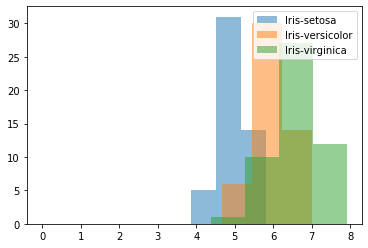

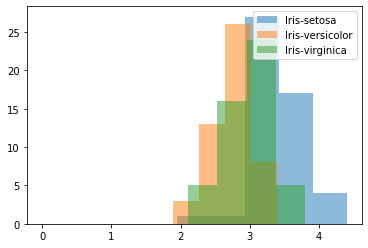

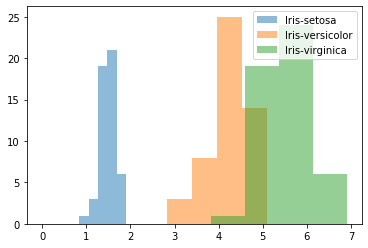

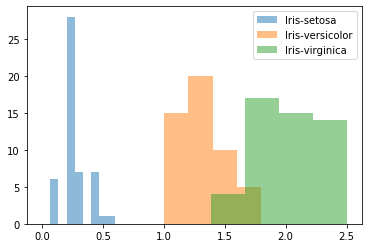

In [6]:
# It is important to visualize your data before diving into machine learning
# NEVER IMPLEMENT AN ALGORITHM WITHOUT FIRST TAKING A LOOK AT THE DATA!!
import matplotlib.pyplot as plt
import numpy as np

features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
colors = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for col in range(4):
    loc = 0
    for key in colors:
        hist_data = X[y==key, col]
        bins = np.linspace(0,np.max(hist_data),10)
        plt.hist(hist_data, bins, alpha=0.5, label=colors[loc])
        plt.legend(loc='upper right')
        loc +=1
        
    plt.show()


In [7]:
'''
Here I am going to standardize the data
'''
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


## The goal of PCA

The goal of PCA is to take a data set that has n features and reduce the number of features (reduce the dimension of the problem) without just throwing away data. We do this by creating a linear transformation that takes us from n dimensions to k dimensions n<k, along the eigenvalues of the covarince matrix.

In [8]:
# Now we get into PCA! We use the eigenvalues of the covariance matrix to define
# a linear transformation that will reduce the number of dimensions in the data

cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)


#Recall that the covariance can be calculated from the mean and standard deviation:

#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)


NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
# Now find the eigenvalues and eigenvectors of the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [10]:
# Confirm that the eigenvalues are all length one
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [11]:
# Make a list of E-val and E-vec pairs and then sort in decending order
# We assume that the larger eigenvalues have a bigger effect

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [12]:
# In general we would do some more statistical analysis to answer the question
# How many principal components are we going to choose for our new feature subspace?" 

# We typically use the explained variance to answer this question.
# Explained variance can be calculated from the eigenvalues. 
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [13]:
# Here we will choose to just keep the first two principle components
D = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix D:\n', D)

Matrix D:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [14]:
# We project along the first two principle components by using matrix multiplication

NewX = X_std.dot(D) # Applies the dot product x_i * W to each column of X_std
NewX.shape

(150, 2)

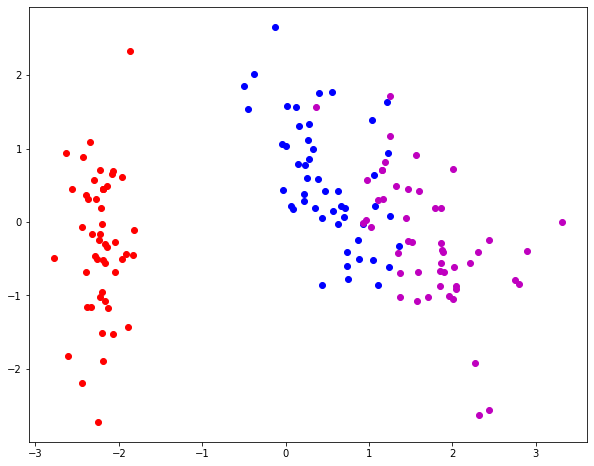

In [15]:
# Now lets plot the new space and see if our irises are easier to classify

features = ['PC1', 'PC2']
colors = ['Iris-setosa','Iris-versicolor','Iris-virginica']
pltcol = ['r','b','m']

# Scatter Plot
plt.figure(figsize=(10, 8))

loc=0
for key in colors:
    X_data = NewX[y==key, 0]
    Y_data = NewX[y==key, 1]
    plt.plot(X_data, Y_data, 'o', color=pltcol[loc])
    loc += 1
        

plt.show()

